In [59]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import warnings
import matplotlib.pyplot as plt

In [22]:
os.chdir('/Users/kamran/Desktop')

In [67]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the XML file
tree = ET.parse('FRAM model-Stroke care system.xfmv')
root = tree.getroot()

# Extract data from Function elements
function_data = []

for function_elem in root.findall('.//Function'):
    element_data = {
        'IDNr': function_elem.findtext('IDNr'),
        'FunctionType': function_elem.findtext('FunctionType'),
        'IDName': function_elem.findtext('IDName'),
        'Description': function_elem.findtext('Description'),
        'x': function_elem.attrib.get('x', None),
        'y': function_elem.attrib.get('y', None),
        'style': function_elem.attrib.get('style', None),
        'color': function_elem.attrib.get('color', None),
    }
    function_data.append(element_data)

# Extract data from Input elements
input_data = []

for input_elem in root.findall('.//Input'):
    input_element_data = {
        'IDNr': input_elem.findtext('IDNr'),
        'IDName': input_elem.findtext('IDName'),
        'FunctionIDNr': input_elem.findtext('FunctionIDNr'),
    }
    input_data.append(input_element_data)

# Extract data from Aspect elements
aspect_data = []

for aspect_elem in root.findall('.//Aspect'):
    aspect_element_data = {
        'x': aspect_elem.attrib.get('x', None),
        'y': aspect_elem.attrib.get('y', None),
        'directionX': aspect_elem.attrib.get('directionX', None),
        'directionY': aspect_elem.attrib.get('directionY', None),
        'notGroup': aspect_elem.attrib.get('notGroup', None),
        'outputFn': aspect_elem.attrib.get('outputFn', None),
        'toFn': aspect_elem.attrib.get('toFn', None),
        'Name': aspect_elem.findtext('Name'),
        'Curve': aspect_elem.findtext('Curve'),
    }
    aspect_data.append(aspect_element_data)

# Create Pandas DataFrames
df_function = pd.DataFrame(function_data)
df_input = pd.DataFrame(input_data)
df_aspect = pd.DataFrame(aspect_data)

"""
# Display the DataFrames
print("Function DataFrame:")
print(df_function)

print("\nInput DataFrame:")
print(df_input)

print("\nAspect DataFrame:")
print(df_aspect)
"""

'\n# Display the DataFrames\nprint("Function DataFrame:")\nprint(df_function)\n\nprint("\nInput DataFrame:")\nprint(df_input)\n\nprint("\nAspect DataFrame:")\nprint(df_aspect)\n'

In [71]:
df_function

IDNr FunctionType                                             IDName  \
0     0            0           Do stroke assessment by a care paramedic   
1     1            0                 Transport the patient by ambulance   
2     2            0                         Gather patient information   
3     3            0  Relay patient information and Call the stroke ...   
4     4            0         Receive a call through the dispatch system   
..  ...          ...                                                ...   
68   68            0                          Calculate Alpha FIM score   
69   69            2                   Access to the stroke order sheet   
70   70            2                    Access to bed monitoring system   
71   71            0                              Hold a family meeting   
72   72            0                Assess the CT scan by a radiologist   

                                          Description                   x  \
0   The role of an advanced care paramedic in stro...  197.89999389648438   
1   Most of stroke patients arrive via ambulance.\...               456.4   
2   Gathering vital signs, getting hit, patient hi...              352.35   
3                                                None               318.9   
4   The call could be from a patient or their fami...               29.65   
..                                                ...                 ...   
68  Alpha FIM reflects patients' ability to partic...             1674.55   
69  The stroke order sheet is used to make sure th...                1206   
70                                               None              920.75   
71  A family meeting is held when patients are sup...                1677   
72  The CT scan should be assessed by either a rad...   753.5000610351563   

                     y   style    color  
0   143.59999084472656   green  1555713  
1                96.55  custom    65535  
2                216.7   green  1555713  
3                122.9   green  1555713  
4               107.55   green  1555713  
..                 ...     ...      ...  
68               227.1    blue   108251  
69              442.25    blue   108251  
70              371.65  purple  9466048  
71  125.00002441406252    blue   108251  
72  304.39996337890625    grey  8618883  

[73 rows x 8 columns]

In [73]:
filtered_df = df_aspect[df_aspect['Name'].str.endswith('I')]
filtered_df.drop(columns=['x', 'y', 'directionX', 'directionY', 'notGroup','Curve'], inplace=True)
filtered_df.rename(columns={"outputFn":"exporter","toFn":"importer"}, inplace=True)
filtered_df

/var/folders/9k/3zsz3fc107gd6tvb4svwc8_h0000gn/T/ipykernel_1160/3622197425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['x', 'y', 'directionX', 'directionY', 'notGroup','Curve'], inplace=True)
/var/folders/9k/3zsz3fc107gd6tvb4svwc8_h0000gn/T/ipykernel_1160/3622197425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={"outputFn":"exporter","toFn":"importer"}, inplace=True)


exporter importer                                               Name
0          0        2           0|Fast exam=positive\nrace score>= 5|2|I
1          0        3           0|Fast exam=positive\nrace score>= 5|3|I
4          1       14                  1|Transfer through ambulance|14|I
5          1       57        1|Activating a code stroke (ambulance)|57|I
7          3        1  3|Relaying information to emergency department...
..       ...      ...                                                ...
179       58       67                              58|TNK candidate|67|I
186       66       57                            66|Signs of stroke|57|I
187       67       18                           67|Clot was removed|18|I
189       67       58                              67|EVT candidate|58|I
193       71       25                                  71|Discharge|25|I

[73 rows x 3 columns]

In [70]:
# Merge the two DataFrames based on the "ID" column for exporter
merged_df_exporter = pd.merge(df_function, filtered_df, left_on="IDNr", right_on="exporter")

merged_df_exporter.drop(['FunctionType', 'IDNr'], axis=1, inplace=True)


merged_df_exporter

IDName  \
0            Do stroke assessment by a care paramedic   
1            Do stroke assessment by a care paramedic   
2                  Transport the patient by ambulance   
3                  Transport the patient by ambulance   
4   Relay patient information and Call the stroke ...   
..                                                ...   
68  Transfer the patient to the angio suite to do EVT   
69          Transfer the patient to neurosurgery ward   
70   Do TNK in CT scanner room (radiology department)   
71   Do TNK in CT scanner room (radiology department)   
72                              Hold a family meeting   

                                          Description                   x  \
0   The role of an advanced care paramedic in stro...  197.89999389648438   
1   The role of an advanced care paramedic in stro...  197.89999389648438   
2   Most of stroke patients arrive via ambulance.\...               456.4   
3   Most of stroke patients arrive via ambulance.\...               456.4   
4                                                None               318.9   
..                                                ...                 ...   
68  Endovascular Therapy (EVT)\nOnce patients have...               841.1   
69  Some patients are hospitalized in neurosurgery...   783.3307448167066   
70  Tenecteplase (TNK)\nTNK is a protein that can ...              872.95   
71  Tenecteplase (TNK)\nTNK is a protein that can ...              872.95   
72  A family meeting is held when patients are sup...                1677   

                     y   style    color exporter importer  \
0   143.59999084472656   green  1555713        0        2   
1   143.59999084472656   green  1555713        0        3   
2                96.55  custom    65535        1       14   
3                96.55  custom    65535        1       57   
4                122.9   green  1555713        3        1   
..                 ...     ...      ...      ...      ...   
68               343.3    grey  8618883       58       67   
69   6.388467641977158  custom  8323135       66       57   
70               106.8    grey  8618883       67       18   
71               106.8    grey  8618883       67       58   
72  125.00002441406252    blue   108251       71       25   

                                                 Name  
0            0|Fast exam=positive\nrace score>= 5|2|I  
1            0|Fast exam=positive\nrace score>= 5|3|I  
2                   1|Transfer through ambulance|14|I  
3         1|Activating a code stroke (ambulance)|57|I  
4   3|Relaying information to emergency department...  
..                                                ...  
68                              58|TNK candidate|67|I  
69                            66|Signs of stroke|57|I  
70                           67|Clot was removed|18|I  
71                              67|EVT candidate|58|I  
72                                  71|Discharge|25|I  

[73 rows x 9 columns]

In [64]:
# Merge the two DataFrames based on the "ID" column for importer
merged_df_importer = pd.merge(df_function, filtered_df, left_on="IDNr", right_on="importer")

merged_df_importer.drop(['FunctionType', 'IDNr'], axis=1, inplace=True)

merged_df_importer

IDName  \
0            Do stroke assessment by a care paramedic   
1                  Transport the patient by ambulance   
2                          Gather patient information   
3   Relay patient information and Call the stroke ...   
4                 Assess the patient by a neurologist   
..                                                ...   
68   Do TNK in CT scanner room (radiology department)   
69                          Calculate Alpha FIM score   
70                          Calculate Alpha FIM score   
71                              Hold a family meeting   
72                Assess the CT scan by a radiologist   

                                          Description                   x  \
0   The role of an advanced care paramedic in stro...  197.89999389648438   
1   Most of stroke patients arrive via ambulance.\...               456.4   
2   Gathering vital signs, getting hit, patient hi...              352.35   
3                                                None               318.9   
4   A neurologist is paged through paging system t...              800.05   
..                                                ...                 ...   
68  Tenecteplase (TNK)\nTNK is a protein that can ...              872.95   
69  Alpha FIM reflects patients' ability to partic...             1674.55   
70  Alpha FIM reflects patients' ability to partic...             1674.55   
71  A family meeting is held when patients are sup...                1677   
72  The CT scan should be assessed by either a rad...   753.5000610351563   

                     y   style     color exporter importer  \
0   143.59999084472656   green   1555713        4        0   
1                96.55  custom     65535        3        1   
2                216.7   green   1555713        0        2   
3                122.9   green   1555713        0        3   
4               183.15  custom  16711935       14       13   
..                 ...     ...       ...      ...      ...   
68               106.8    grey   8618883       58       67   
69               227.1    blue    108251       32       68   
70               227.1    blue    108251       33       68   
71  125.00002441406252    blue    108251       35       71   
72  304.39996337890625    grey   8618883       57       72   

                                                 Name  
0                              4|Potential stroke|0|I  
1   3|Relaying information to emergency department...  
2            0|Fast exam=positive\nrace score>= 5|2|I  
3            0|Fast exam=positive\nrace score>= 5|3|I  
4   14|Assigning the patient to a neurologist from...  
..                                                ...  
68                              58|TNK candidate|67|I  
69                32|Calculating Alpha FIM score|68|I  
70                33|Calculating Alpha FIM score|68|I  
71                             35|Family meeting|71|I  
72                                57|Code stroke|72|I  

[73 rows x 9 columns]

In [54]:
len(filtered_df["exporter"].unique())

27

In [55]:
len(filtered_df["importer"].unique())

40

In [75]:
# Merge dataframes based on exporter and importer columns
df_exporter_info = pd.merge(filtered_df, df_function, left_on='exporter', right_on='IDNr')

# Merge dataframes based on importer and exporter columns
df_importer_info = pd.merge(filtered_df, df_function, left_on='importer', right_on='IDNr')


In [77]:
df_exporter_info

exporter importer                                               Name IDNr  \
0         0        2           0|Fast exam=positive\nrace score>= 5|2|I    0   
1         0        3           0|Fast exam=positive\nrace score>= 5|3|I    0   
2         1       14                  1|Transfer through ambulance|14|I    1   
3         1       57        1|Activating a code stroke (ambulance)|57|I    1   
4         3        1  3|Relaying information to emergency department...    3   
..      ...      ...                                                ...  ...   
68       58       67                              58|TNK candidate|67|I   58   
69       66       57                            66|Signs of stroke|57|I   66   
70       67       18                           67|Clot was removed|18|I   67   
71       67       58                              67|EVT candidate|58|I   67   
72       71       25                                  71|Discharge|25|I   71   

   FunctionType                                             IDName  \
0             0           Do stroke assessment by a care paramedic   
1             0           Do stroke assessment by a care paramedic   
2             0                 Transport the patient by ambulance   
3             0                 Transport the patient by ambulance   
4             0  Relay patient information and Call the stroke ...   
..          ...                                                ...   
68            0  Transfer the patient to the angio suite to do EVT   
69            0          Transfer the patient to neurosurgery ward   
70            0   Do TNK in CT scanner room (radiology department)   
71            0   Do TNK in CT scanner room (radiology department)   
72            0                              Hold a family meeting   

                                          Description                   x  \
0   The role of an advanced care paramedic in stro...  197.89999389648438   
1   The role of an advanced care paramedic in stro...  197.89999389648438   
2   Most of stroke patients arrive via ambulance.\...               456.4   
3   Most of stroke patients arrive via ambulance.\...               456.4   
4                                                None               318.9   
..                                                ...                 ...   
68  Endovascular Therapy (EVT)\nOnce patients have...               841.1   
69  Some patients are hospitalized in neurosurgery...   783.3307448167066   
70  Tenecteplase (TNK)\nTNK is a protein that can ...              872.95   
71  Tenecteplase (TNK)\nTNK is a protein that can ...              872.95   
72  A family meeting is held when patients are sup...                1677   

                     y   style    color  
0   143.59999084472656   green  1555713  
1   143.59999084472656   green  1555713  
2                96.55  custom    65535  
3                96.55  custom    65535  
4                122.9   green  1555713  
..                 ...     ...      ...  
68               343.3    grey  8618883  
69   6.388467641977158  custom  8323135  
70               106.8    grey  8618883  
71               106.8    grey  8618883  
72  125.00002441406252    blue   108251  

[73 rows x 11 columns]

In [78]:
df_importer_info

exporter importer                                               Name IDNr  \
0         0        2           0|Fast exam=positive\nrace score>= 5|2|I    2   
1         0        3           0|Fast exam=positive\nrace score>= 5|3|I    3   
2         1       14                  1|Transfer through ambulance|14|I   14   
3        13       14                                  13|No stroke|14|I   14   
4        41       14           41|Transfer through other hospitals|14|I   14   
..      ...      ...                                                ...  ...   
68       36       40  36|Assigning the patient to a nurse practition...   40   
69       36       46        36|Assigning the patient to a resident|46|I   46   
70       36       35                  36|Holding stroke team round|35|I   35   
71       57       72                                57|Code stroke|72|I   72   
72       71       25                                  71|Discharge|25|I   25   

   FunctionType                                             IDName  \
0             0                         Gather patient information   
1             0  Relay patient information and Call the stroke ...   
2             0     Admit the patient to emergency department (ED)   
3             0     Admit the patient to emergency department (ED)   
4             0     Admit the patient to emergency department (ED)   
..          ...                                                ...   
68            0         Assess the patient by a nurse practitioner   
69            0         Assess the patient by a neurology resident   
70            0         Hold stroke multi-disciplinary team rounds   
71            0                Assess the CT scan by a radiologist   
72            0                              Discharge the patient   

                                          Description                   x  \
0   Gathering vital signs, getting hit, patient hi...              352.35   
1                                                None               318.9   
2   Stroke patients would either enter the emergen...   571.2000122070313   
3   Stroke patients would either enter the emergen...   571.2000122070313   
4   Stroke patients would either enter the emergen...   571.2000122070313   
..                                                ...                 ...   
68  A stroke nurse practitioner takes care of spec...             1195.15   
69                                                     1199.5500000000002   
70  Anybody who is admitted with a stroke, we have...             1302.55   
71  The CT scan should be assessed by either a rad...   753.5000610351563   
72  The multidisciplinary team decides to discharg...              1810.1   

                     y   style     color  
0                216.7   green   1555713  
1                122.9   green   1555713  
2   209.44998168945313  yellow  12236583  
3   209.44998168945313  yellow  12236583  
4   209.44998168945313  yellow  12236583  
..                 ...     ...       ...  
68               104.8    blue    108251  
69    310.849853515625    blue    108251  
70               209.6    blue    108251  
71  304.39996337890625    grey   8618883  
72              204.85    blue    108251  

[73 rows x 11 columns]

In [79]:
df_function

IDNr FunctionType                                             IDName  \
0     0            0           Do stroke assessment by a care paramedic   
1     1            0                 Transport the patient by ambulance   
2     2            0                         Gather patient information   
3     3            0  Relay patient information and Call the stroke ...   
4     4            0         Receive a call through the dispatch system   
..  ...          ...                                                ...   
68   68            0                          Calculate Alpha FIM score   
69   69            2                   Access to the stroke order sheet   
70   70            2                    Access to bed monitoring system   
71   71            0                              Hold a family meeting   
72   72            0                Assess the CT scan by a radiologist   

                                          Description                   x  \
0   The role of an advanced care paramedic in stro...  197.89999389648438   
1   Most of stroke patients arrive via ambulance.\...               456.4   
2   Gathering vital signs, getting hit, patient hi...              352.35   
3                                                None               318.9   
4   The call could be from a patient or their fami...               29.65   
..                                                ...                 ...   
68  Alpha FIM reflects patients' ability to partic...             1674.55   
69  The stroke order sheet is used to make sure th...                1206   
70                                               None              920.75   
71  A family meeting is held when patients are sup...                1677   
72  The CT scan should be assessed by either a rad...   753.5000610351563   

                     y   style    color  
0   143.59999084472656   green  1555713  
1                96.55  custom    65535  
2                216.7   green  1555713  
3                122.9   green  1555713  
4               107.55   green  1555713  
..                 ...     ...      ...  
68               227.1    blue   108251  
69              442.25    blue   108251  
70              371.65  purple  9466048  
71  125.00002441406252    blue   108251  
72  304.39996337890625    grey  8618883  

[73 rows x 8 columns]

In [89]:
df_function['style'].unique()

array(['green', 'custom', 'yellow', 'grey', 'purple', 'red', 'blue', None],
      dtype=object)

In [ ]:
df_exporter_info['x'] = pd.to_numeric(df_exporter_info['x'], errors='coerce')
df_exporter_info['y'] = pd.to_numeric(df_exporter_info['y'], errors='coerce')
df_importer_info['x'] = pd.to_numeric(df_importer_info['x'], errors='coerce')
df_importer_info['y'] = pd.to_numeric(df_importer_info['y'], errors='coerce')


In [92]:
# Replace values based on condition
condition = (df_importer_info['style'] == 'custom')
custom_values = df_importer_info.loc[condition, 'style']

# Get the order of unique custom values
order = pd.Series(np.arange(1, len(custom_values) + 1), index=custom_values)

# Replace values in the DataFrame
df_importer_info.loc[condition, 'style'] = df_importer_info.loc[condition, 'style'].map(order)



InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# Replace values based on condition
condition = (df['your_column'] == 'custom')
custom_values = df.loc[condition, 'your_column']

# Get the order of unique custom values
order = pd.Series(np.arange(1, len(custom_values) + 1), index=custom_values)

# Replace values in the DataFrame
df.loc[condition, 'your_column'] = df.loc[condition, 'your_column'].map(order)

# Display the updated DataFrame
print(df)

In [96]:
df_function.loc[df_function['style'] == "custom"]

IDNr FunctionType                                     IDName  \
1     1            0         Transport the patient by ambulance   
13   13            0        Assess the patient by a neurologist   
41   41            2    Transfer a patient from other hospitals   
53   53            2   Transfer a patient by a family caregiver   
56   56            0                     Check bed availability   
60   60            2               Follow bed assignment policy   
66   66            0  Transfer the patient to neurosurgery ward   

                                          Description                  x  \
1   Most of stroke patients arrive via ambulance.\...              456.4   
13  A neurologist is paged through paging system t...             800.05   
41  Patients could also be admitted to ED directly...             456.75   
53  Patients could also go to ED by their caregivers.              456.6   
56        Bed availability is a is a limiting factor.             1094.8   
60                                               None              995.9   
66  Some patients are hospitalized in neurosurgery...  783.3307448167066   

                    y   style     color  
1               96.55  custom     65535  
13             183.15  custom  16711935  
41             202.15  custom     65535  
53              305.3  custom     65535  
56              328.1  custom   8323327  
60             448.25  custom   8323327  
66  6.388467641977158  custom   8323135

In [101]:
df_importer_info.loc[df_importer_info['style'] == "nan"]

Empty DataFrame
Columns: [exporter, importer, Name, IDNr, FunctionType, IDName, Description, x, y, style, color]
Index: []

In [102]:
df_exporter_info.loc[df_exporter_info['style'] == "nan"]

Empty DataFrame
Columns: [exporter, importer, Name, IDNr, FunctionType, IDName, Description, x, y, style, color]
Index: []

In [91]:
df_function.loc[df_function['style'] == "custom"]

["aqua",
"fuchsia",
"aqua",
"aqua",
"darkviolet",
"darkviolet",
"indianred"]


IDNr FunctionType                                     IDName  \
1     1            0         Transport the patient by ambulance   
13   13            0        Assess the patient by a neurologist   
41   41            2    Transfer a patient from other hospitals   
53   53            2   Transfer a patient by a family caregiver   
56   56            0                     Check bed availability   
60   60            2               Follow bed assignment policy   
66   66            0  Transfer the patient to neurosurgery ward   

                                          Description                  x  \
1   Most of stroke patients arrive via ambulance.\...              456.4   
13  A neurologist is paged through paging system t...             800.05   
41  Patients could also be admitted to ED directly...             456.75   
53  Patients could also go to ED by their caregivers.              456.6   
56        Bed availability is a is a limiting factor.             1094.8   
60                                               None              995.9   
66  Some patients are hospitalized in neurosurgery...  783.3307448167066   

                    y   style     color  
1               96.55  custom     65535  
13             183.15  custom  16711935  
41             202.15  custom     65535  
53              305.3  custom     65535  
56              328.1  custom   8323327  
60             448.25  custom   8323327  
66  6.388467641977158  custom   8323135

In [97]:
# Your list of styles corresponding to each color
style_list = ["aqua", "fuchsia", "aqua", "aqua", "darkviolet", "darkviolet", "indianred"]

# Create a dictionary to map IDName to style
idname_style_mapping = dict(zip(df_importer_info['IDName'], style_list))

# Map the styles to the 'style' column in df_importer_info
df_importer_info['style'] = df_importer_info['IDName'].map(idname_style_mapping)

# Map the styles to the 'style' column in df_exporter_info
df_exporter_info['style'] = df_exporter_info['IDName'].map(idname_style_mapping)

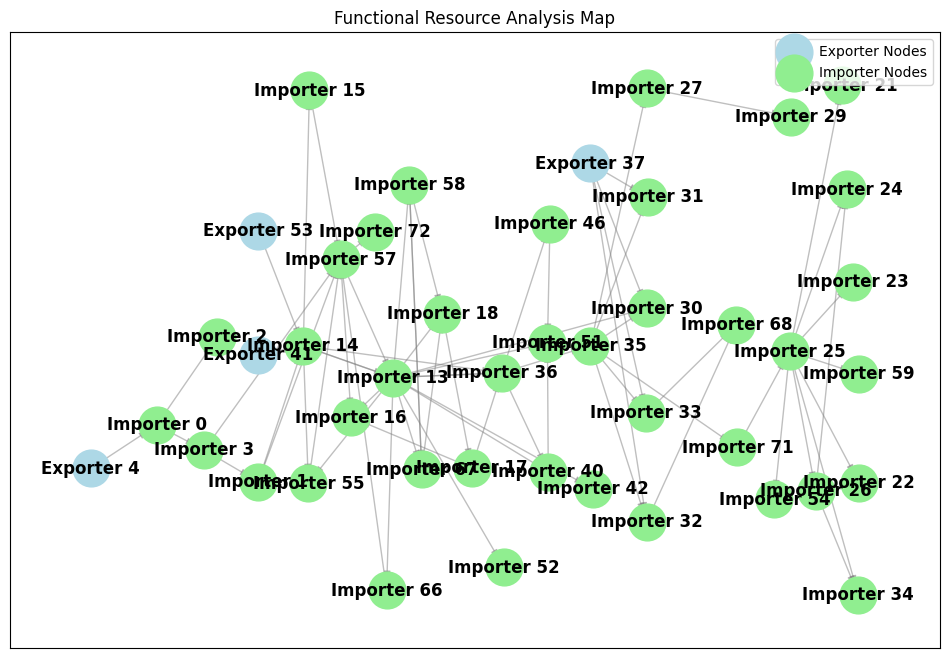

In [86]:
df_exporter_info['x'] = pd.to_numeric(df_exporter_info['x'], errors='coerce')
df_exporter_info['y'] = pd.to_numeric(df_exporter_info['y'], errors='coerce')
df_importer_info['x'] = pd.to_numeric(df_importer_info['x'], errors='coerce')
df_importer_info['y'] = pd.to_numeric(df_importer_info['y'], errors='coerce')

# Create a directed graph
G = nx.DiGraph()

# Add exporter nodes
for _, row in df_exporter_info.iterrows():
    exporter_node = row['exporter']
    G.add_node(exporter_node, label=f"Exporter {exporter_node}", pos=(row['x'], row['y']), type='exporter')

# Add importer nodes
for _, row in df_importer_info.iterrows():
    importer_node = row['importer']
    G.add_node(importer_node, label=f"Importer {importer_node}", pos=(row['x'], row['y']), type='importer')

# Create connections dataframe
connections_data = {'exporter': df_exporter_info['exporter'], 'importer': df_exporter_info['importer']}
connections_df = pd.DataFrame(connections_data)

# Add edges to the graph
for _, row in connections_df.iterrows():
    exporter_node = row['exporter']
    importer_node = row['importer']
    G.add_edge(exporter_node, importer_node)

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
fig, ax = plt.subplots(figsize=(12, 8))

# Draw exporter nodes
exporter_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'exporter']
nx.draw_networkx_nodes(G, pos, nodelist=exporter_nodes, node_size=700, node_color="lightblue", label='Exporter Nodes')

# Draw importer nodes
importer_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'importer']
nx.draw_networkx_nodes(G, pos, nodelist=importer_nodes, node_size=700, node_color="lightgreen", label='Importer Nodes')

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_color="black", font_weight="bold")

plt.title('Functional Resource Analysis Map')
plt.legend()
plt.show()

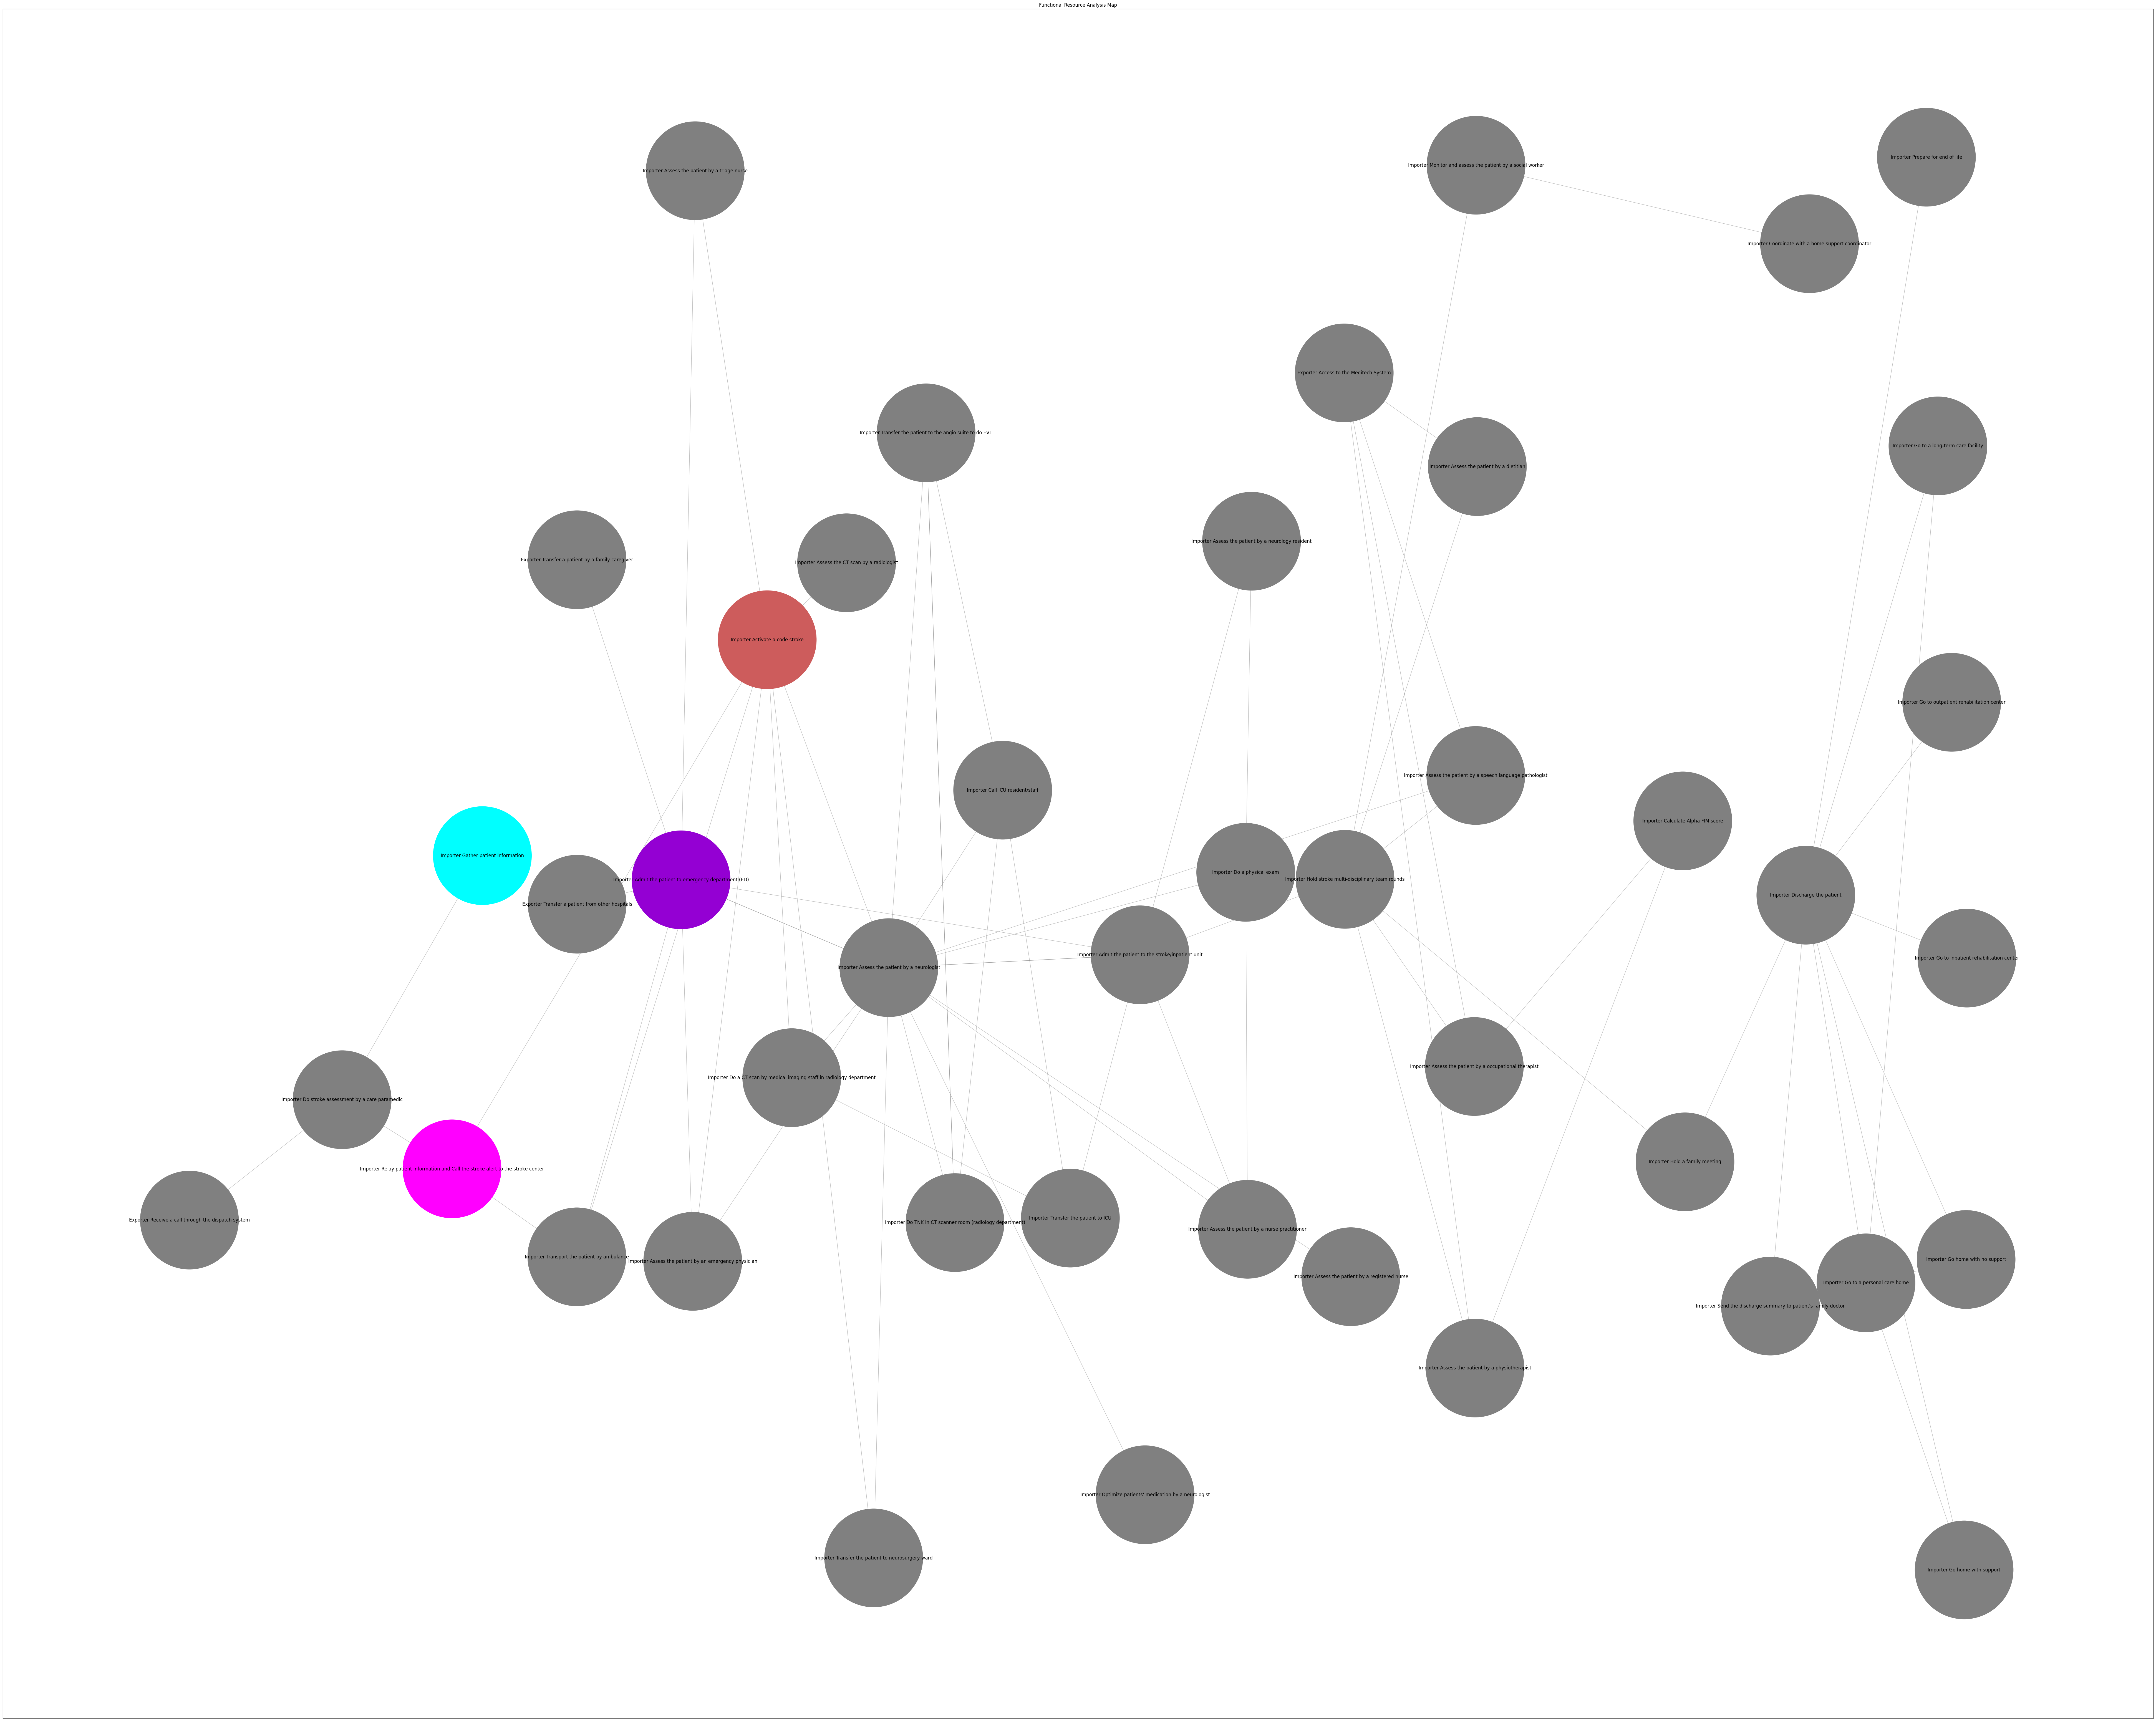

In [127]:

# Create a directed graph
G = nx.DiGraph()

# Add exporter nodes with color attribute
for _, row in df_exporter_info.iterrows():
    exporter_node = row['exporter']
    G.add_node(exporter_node, label=f"Exporter {row['IDName']}", pos=(row['x'], row['y']), type='exporter', style=row['style'])

# Add importer nodes with color attribute
for _, row in df_importer_info.iterrows():
    importer_node = row['importer']
    G.add_node(importer_node, label=f"Importer {row['IDName']}", pos=(row['x'], row['y']), type='importer', style=row['style'])

# Create connections dataframe
connections_data = {'exporter': df_exporter_info['exporter'], 'importer': df_exporter_info['importer']}
connections_df = pd.DataFrame(connections_data)

# Add edges to the graph
for _, row in connections_df.iterrows():
    exporter_node = row['exporter']
    importer_node = row['importer']
    G.add_edge(exporter_node, importer_node)

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Use fillna to replace NaN values with a default color
default_color = 'gray'
exporter_colors = [df_exporter_info[df_exporter_info['exporter'] == node]['style'].fillna(default_color).iloc[0] for node in G.nodes if G.nodes[node]['type'] == 'exporter']
importer_colors = [df_importer_info[df_importer_info['importer'] == node]['style'].fillna(default_color).iloc[0] for node in G.nodes if G.nodes[node]['type'] == 'importer']

# Draw the graph
fig, ax = plt.subplots(figsize=(100, 80))

# Draw exporter nodes with color and larger node_size
exporter_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'exporter']
nx.draw_networkx_nodes(G, pos, nodelist=exporter_nodes, node_size=65000, node_color=exporter_colors, label='Exporter Nodes')  # Adjust node_size to make the nodes larger

# Draw importer nodes with color and larger node_size
importer_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'importer']
nx.draw_networkx_nodes(G, pos, nodelist=importer_nodes, node_size=65000, node_color=importer_colors, label='Importer Nodes')  # Adjust node_size to make the nodes larger

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.5)

# Draw node labels with IDName and adjust font size
node_labels = {node: G.nodes[node]['label'] for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color="black", font_size=12)

plt.title('Functional Resource Analysis Map')
plt.show()


In [134]:


# Assuming df_exporter_info and df_importer_info are the dataframes from the previous step
import networkx as nx
# Create a directed graph
G = nx.DiGraph()

# Add exporter nodes with color attribute
for _, row in df_exporter_info.iterrows():
    exporter_node = row['exporter']
    G.add_node(exporter_node, label=f"Exporter {row['IDName']}", pos=(row['x'], row['y']), type='exporter', style=row['style'])

# Add importer nodes with color attribute
for _, row in df_importer_info.iterrows():
    importer_node = row['importer']
    G.add_node(importer_node, label=f"Importer {row['IDName']}", pos=(row['x'], row['y']), type='importer', style=row['style'])

# Create connections dataframe
connections_data = {'exporter': df_exporter_info['exporter'], 'importer': df_exporter_info['importer']}
connections_df = pd.DataFrame(connections_data)

# Add edges to the graph
for _, row in connections_df.iterrows():
    exporter_node = row['exporter']
    importer_node = row['importer']
    G.add_edge(exporter_node, importer_node)

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Use fillna to replace NaN values with a default color
default_color = 'green'
exporter_colors = [df_exporter_info[df_exporter_info['exporter'] == node]['style'].fillna(default_color).iloc[0] for node in G.nodes if G.nodes[node]['type'] == 'exporter']
importer_colors = [df_importer_info[df_importer_info['importer'] == node]['style'].fillna(default_color).iloc[0] for node in G.nodes if G.nodes[node]['type'] == 'importer']

# Draw the graph
fig, ax = plt.subplots(figsize=(100, 100))

# Draw exporter nodes with color and larger node_size
exporter_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'exporter']
nx.draw_networkx_nodes(G, pos, nodelist=exporter_nodes, node_size=65000, node_color=exporter_colors, label='Exporter Nodes')

# Draw importer nodes with color and larger node_size
importer_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'importer']
nx.draw_networkx_nodes(G, pos, nodelist=importer_nodes, node_size=65000, node_color=importer_colors, label='Importer Nodes')

# Draw curved edges with thicker arrows and larger arrowheads
for edge in G.edges:
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color='gray', width=2, alpha=0.7, connectionstyle="arc3,rad=0.1", arrowsize=20)

# Draw node labels with IDName and adjust font size
node_labels = {node: G.nodes[node]['label'] for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color="black",  font_size=16)

plt.title('Functional Resource Analysis Map')
plt.show()
